# 1. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

앞선 예시에서 Degree(차수)가 1인 모델은 지나치게 예측 곡선을 단순화해 데이터에 적합하지 않은 과소적합 모델이 생성되었다.  
반대로 Degree가 15인 모델은 지나치게 과적합이 발생하였다.  

-> 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.  

이전까지, 선형 모델의 비용 함수는 $RSS$를 최소화하는, 잔차를 최소화하는 것만 중점에 두었다. 그러다 보니 학습 데이터에 편향되게 학습이 되고, 그에 따라 회귀 계수가 쉽게 커졌다.  

이럴 경우 __변동성__ 이 심해져서 테스트 데이터에서는 예측 성능이 저하되게 쉽상이다.  

이를 반영해 비용 함수는 $RSS$를 최소화하는 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루어야 한다.  

  
$$ \text{Goal of RSS} = Min(RSS(W) + alpha*||W||_2^2) $$  

최적 모델을 위한 비용 함수의 구성요소는 다음과 같다.  

학습 데이터의 잔차 오류를 최소화하여 최대한 정확한 모델을 구현하고, 회귀계수의 크기를 적절히 제어하여 성능 대비 과적합 발생 확률을 제어해야 한다.  

위의 식에서 $alpha$는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 `튜닝 파라미터`이다.  
  
$alpha$가 비용 함수의 값을 최소화 하는데에 하는 역할을 알아보자.

## 1) Regularization

* $alpha$ = 0인 경우 $\text{Goal of RSS} = Min(RSS(W))$


* $alpha$가 무한대로 큰 경우 $alpha*||W||_2^2$가 무한대가 되므로 비용함수는 $W$를 0에 가깝게 최소화 해야함.  
  
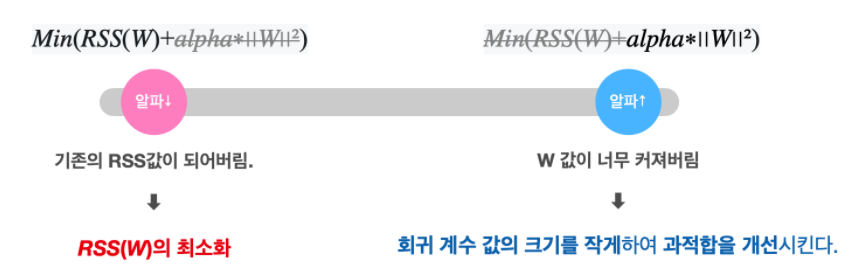

즉, $alpha$ 값을 작게 하면 회귀 계수 $W$의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있고  

$alpha$ 값을 크게 하면 전체적인 비용 함수의 값이 커져 $W$의 값을 작게 해 과적합을 개선할 수 있다.  
  
-> $alpha$를 0에서부터 지속적으로 값을 증가시키면 회귀계수 $W$의 값을 줄일 수 있다.  
  
  
이처럼 비용 함수에 $alpha$ 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소키셔 과적합을 개선하는 방식을 __`규제(Regularization)`__ 라고 한다.  
  
`Regularization`은 __overfitting__ 을 방지한다. 규제항을 통해 모델이 미치는 차원의 수를 감소시키기 때문이다.  
  
  
  
일반적으로 회귀방법에서 비용 함수는 `MSE`를 최소화하는 방향으로 나아간다. 일반적인 회귀방법에서 데이터의 피쳐가 많아질수록(차원이 증가할 수록) overfitting의 위험성이 커진다. 최소화를 진행하면서 가중치가 낮은 항은 규제화 방법에 따라 0으로 수렴시켜 사용하지 않거나 0에 가까운 수로 바꿔 영향을 덜 끼치게 만든다.

### __< 규제화의 필요성 >__

좋은 모델이란 무엇일까?  

좋은 모델이란 현재 주어진 데이터를 잘 설명하고 미래 데이터에 대한 예측 정확도가 높은 모델을 의미한다.  
즉, Bias가 낮고 Variance가 낮은 정교한 모델을 의미한다.  

기존의 선형회귀 모델의 방식은 __`LSE(Least Squaraes estimation method)`__ 를 사용했다. 최소제곱법의 장점은 편향성이 낮으며, Unbiased Estimator 중 분산이 가장 적다.  
그렇다고 LSE가 가장 좋다고 할 수 있을까?  

그렇지만은 않다.  

LSE(최소제곱법)은 다중 회귀 모델에서 다중공산성으로 인한 과적합 문제가 커지고, 설명변수가 많아질수록 기존 LSE의 분산이 커셔 불안정한 예측을 하게 된다. 만약 설명변수의 개수가 전체 데이터의 수보다 크다면, LSE의 unique한 해가 존재하지 않는다.  

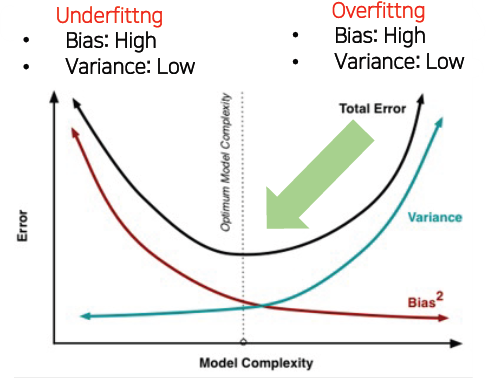

이러한 이유로 특정 변수 선택으로 인한 bias 증가보다 variance 감소 폭이 더 큰 경우, 경우에 따라서 페널티를 부과하여 회귀계수를 제약할 필요가 있다.  

우리는 이를 `규제화`라고 한다.

규제화란 회귀 계수가 가질 수 있는 값에 제약조건을 부여하는 방법으로, 제약조건에 의해 기존 LSE 방식보다 bias가 증가할 수 있지만, variance가 더 큰 폭으로 줄어들어 효율적이다.  

또한, $alpha$ 의 크기 조절을 통해 Training accuracy 와 Generalization accuracy 모두 향상시킬 수 있다.

## 2) Ridge(릿지)

__`Ridge`__ 는 `L2-Norm`을 사용한 회귀 방법으로 일반적으로 영향을 거의 미치지 않는 피쳐에 대해서 0에 가까운 가중치를 준다.  
  
$$ \text{Goal of RSS} = Min(RSS(W) + alpha*||W||^2) $$  

페널티 항의 역할을 계수의 제곱합을 최소화한다. 만약 계수들의 개수가 많을 때, 계수 크키가 커지면 variance가 높아지기 때문에 과적합이 발생할 확률이 높고 예측 성능은 저하된다. 따라서 우리는 페널티 항을 통해 계수 크기에 제약을 건다.  

$alpha$에 대해 규제를 크게 건다는 것은, 계수들의 값을 더 작게 선택하여 모델의 복잡성을 낮춘다는 것이고, 규제를 작게 건다는 것은 계수들에 대한 LSE의 영향력을 키워 모델의 복잡성을 높이기 때문에 분산은 증가하고 편향은 감소한다.  

따라서 __Ridge__ 는 LSE에 비해 bias를 갖지만, variance가 큰 폭으로 감소되고, 피쳐가 데이터의 수보다 많아도 유일한 해를 가지며, 소수 데이터 특성에 국한되지 않은 모델을 구축한다.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston dataset의 target array는 주택 가격. 이를 PRICE 칼럼으로 추가
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 :', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Boston 데이터셋 크기 : (506, 14)
 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


릿지의 5개 폴드의 평균 RMSE가 5.518로 앞선 예제의 RMSE 보다 뛰어난 예측 성능을 보인다.  
  
이제 릿지의 $alpha$ 값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE 와 회귀 계수 값의 변화를 살펴보자

In [2]:
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse를 구함
for i in alphas:
    ridge = Ridge(alpha = i)
    
    # cross_val_score를 이용하여 5Fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(i,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


$alpha = 100$ 일때 RMSE가 5.33으로 가장 좋다.

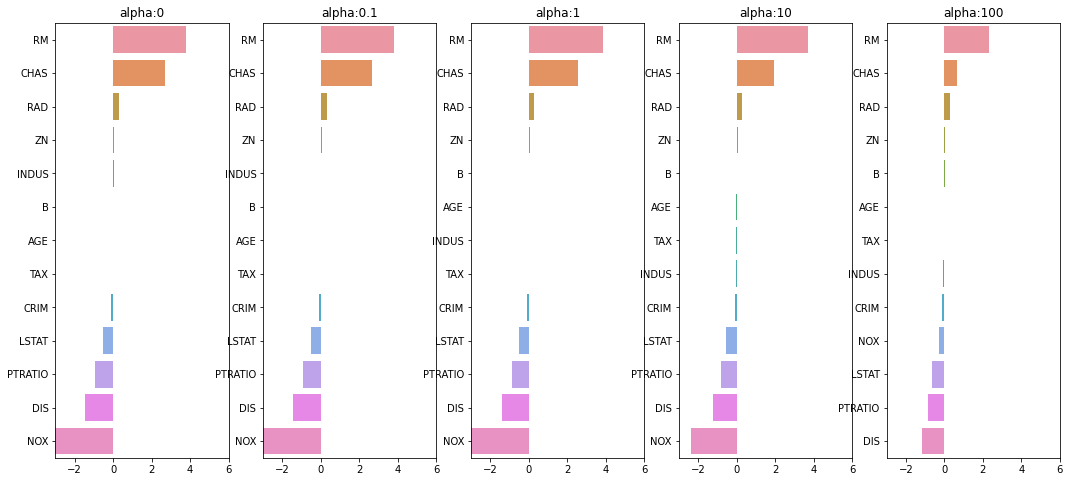

In [3]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성 
fig, axs = plt.subplots(figsize = (18,8), nrows = 1, ncols = 5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장
# pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

$alpha$값을 증가할 때 마다 전체적으로 회귀 계수의 값이 감소함을 알 수 있다.

In [4]:
# alpha값에 따른 칼럼별 회귀계수 출력
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


회귀 계수가 지속적으로 작아짐을 직관적으로 알 수 있다.  

-> __릿지 회귀는 회귀 계수를 0으로 만들지는 않는다.__

## 3) Lasso(라쏘)

__`Lasso`__ 는 `L1_Norm`을 사용한 회귀 방법으로 일반적으로 영향을 거의 미치지 않는 피쳐를 0의 가중치를 주어 피쳐를 삭제시켜 버린다.  

$$ \text{Goal of RSS} = Min(RSS(W) + alpha*||W||_1) $$  

`alpha`값이 커질수록 회귀 계수를 줄이고, 영향력이 낮다고 판단되는 피쳐는 0의 가중치를 주어 __Feature_Selection__ 의 역할을 하기도 한다.

In [5]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df

In [6]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


$alpha = 0.07$ 일 때 가장 좋은 RMSE 평균을 가진다.

In [7]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


$alpha$의 크기가 증가함에 따라 일부 회귀 계수는 아예 0으로 바뀌었다.  

-> 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있다.

## 3) ElasticNet (엘라스틱넷)

__`ElasticNet`__ 은 L2(Ridge) 규제와 L1(Lasso) 규제를 결합한 회귀이다.

$$ \text{Goal of RSS} = Min(RSS(W) + alpha_2*||W||^2 + RSS(W) + alpha_1*||W||_1) $$  

라쏘 회귀는 서로 상관관계가 높은 피쳐들의 경우에 이들 중 중요 피쳐만 셀렉션하고 다른 피쳐들은 모두 회귀 계수를 0으로 만들어 버리는 성향이 강하다. 특히 이러한 성향으로 인해 `alpha`값에 따라 회귀 계수의 값이 급격히 변동할 수 있는데, 엘라스틱넷은 이를 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것이다.  

엘라스틱넷의 단점은 L1과 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다는 것이다.  
  
엘라스틱넷의 규제는 $a*Lasso + b*Ridge$ 로 정의될 수 있다. (a, b는 각각의 alpha값)  
따라서 `ElasticNet` 클래스의 `alpha` 파라미터 값은 $a+b$ 이다.  

`ElasticNet` 클래스의 `l1_ratio` 파라미터 값은 $a / (a+b)$ 이다.  

`l1_ratio = 0`이면 __a = 0__ 이므로 L2(Ridge) 규제와 동일하다.  
`l1_ratio = 1`이면 __b = 0__ 이므로 L1(Lasso) 규제와 동일하다.

In [8]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [9]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


$alpha = 0.5$ 일 때 RMSE가 5.467로 가장 좋은 예측 성능을 보인다.  

$alpha$ 값에 따른 피처들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있다.

## 4) 선형 회귀 모델을 위한 데이터 변환

선형 회귀 모델과 같은 선형 모델은 일반적으로 피처와 타겟값 간에 선형의 관계가 있다고 가정하고, 이러한 최적이 선형함수를 찾아내 결과값을 예측한다. 선형 회귀 모델은 피처 값과 타겟값의 분포가 정규분포 형태를 가지는 것을 매우 선호한다.  
  
특히 타겟값의 경우 정규 분포 형태가 아니라 특정값의 분포가 치우진 왜곡된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높다. 피처값 역시 결정값보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 가능성이 높다.  
  
따라서 __선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적이다__. 하지만 이러한 스케일링/정규화 작업을 수행한다고 무조건 예측 성능이 향상되는 것은 아니다. 일반적으로 중요 피처들이나 타겟값의 분포도가 심하게 왜곡됐을 경우에 이러한 변환 작업을 수행한다.

1. `StandardScaler` 클래스를 이용해 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 `MinMaxScaler` 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화 수행  
  
2. 스케일링/정규화를 수행한 데이터 세트에 다시 `다항 특성`을 적용하여 변환하는 방법. 보통 1번 방법을 통해 예측 성능에 향상이 없을 경우 이와 같은 방법 적용  
  
3. 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포. 이러한 변환을 `로그 변환`이라 명칭. 1번 방법의 경우 예측 성능 향상을 드라마틱하게 기대하긴 어렵고, 2번 방법의 경우 피처의 개수가 매우 많을 경우 다항 변환으로 생성되는 피처의 개수가 기하급수적으로 늘어나 과적합이 발생 할 수도 있기 때문에 매우 유용한 변환  
  
__타겟값의 경우는 일반적으로 로그 변환을 적용한다.__ 결정 값을 정규 분포나 다른 정규값으로 변환하면 변환된 값을 다시 원본 타깃값으로 원복하기 어려울 수 있기 때문.

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [11]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]

# 변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성(2차 다항식), 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS

일반적으로 데이터의 분포가 많이 왜곡되어 있는 경우, `Scaling`을 통해 정규분포 형태로 데이터를 변환해 준 뒤 (보통 log 변환) 모델에 학습을 하면 된다.

# 2. Robust Regression

일반적으로 선형 회귀 모델에서는 회귀 계수를 추정할 때 잔차의 제곱합($RSS$)을 이용하는 `최소제곱법`을 사용한다. 그런데 만약 이상치가 많은 데이터라면 어떨까?  

만약 우리가 원하는 값이 10인데, 11이라는 데이터가 5개, 9라는 데이터가 5개 있다고 가정하자. $RSS$는 에러값을 제곱하여 더하는 형태이기 때문에 각각의 에러를 합해도 에러가 10 밖에 되지 않는다. 이 경우 원하는 target값에 비해 기존 데이터에 이상치가 없기 때문에 가능한 현상이다.  
  
그럼, 만약 10이라는 값을 원하는데 25라는 값이 들어오게 된다면 오차는 15이기 때문에 에러가 225가 되버려 데이터의 분포가 크게 왜곡될 것이다.  
즉, 기본적인 `Linear Regression`의 형태는 __Outlier__ 에 민감하다는 단점을 가지고 있다.  

이러한 단점을 보완하기 위한 기법이 바로 __`Robust Regression`__ 이다. 모델의 형태 자체는 일반적인 선형 회귀 모델과 동일하지만, 회귀 계수 추정 방법에 있어 차이점이 있다. 가장 널리 알려진 Robust Regression 기법은 잔차의 제곱 대신 절대값의 합이 최소가 되도록 게수를 추정하는 방식이다.

요약하자면  

* 선형 회귀 모델은 오차항의 제곱합을 최소로 하기 때문에 이상치(outlier)에 크게 영향을 받음  

* 어떤 상황에서는 데이터의 아주 작은 일부분이 추정 모델의 가중치에 큰 영향을 미침  

* 이상치를 제거하지 않고 ML 에서는 `RANSAC(RANdom SAmple Consensus)` 방식으로 해결 가능  



## 1) RANSAC(RANdom SAmple Consensus)

__`RANSAC(RANdom SAmple Consensus)`__  : 데이터에서 노이즈를 제거하고 모델을 예측하는 알고리즘  
  
특정 임계값 이상의 데이터를 완전히 무시해버리는 특성이 있어 outlier에 효율적인 알고리즘.

### 1] RANSAC의 Pipeline

`RANSAC`의 규칙은 생각보다 간단하다. 전체 데이터에서 N개의 sample을 선택하고 선택된 sample을 통해 모델을 예측한다.  
그 후 데이터 셋에서 모델과 일치하는 데이터의 수를 센 후, 최대 값일 경우 해당 모델을 선택하여 파라미터를 새롭게 설정한다.  

위의 과정을 n번 반복하여 최선의 모델을 선택한다.  

예를 들어보자.  

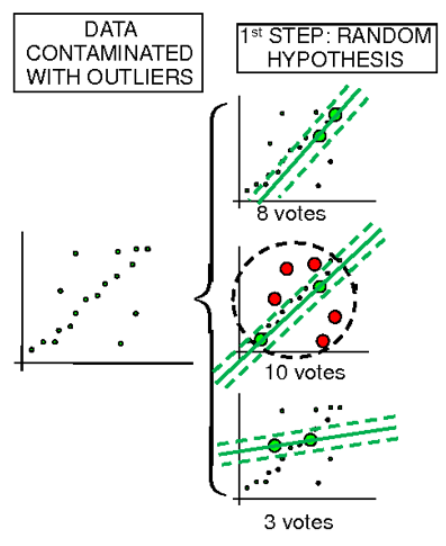  
(출처 : https://gnaseel.tistory.com/33)  



왼쪽 그림은 raw data이다. 우리는 직관적으로 해당 데이터는 직선형태를 가지며 어느정도 노이즈를 가진다는 것을 알 수 있다.  

오른쪽 그림은 랜덤으로 데이터를 뽑아 모델링 한 결과이다. 초록색 실선은 회귀 모델을 적용한 직선을 의미하며 점선은 적절한 임계값을 의미한다.  

첫번 째 모델은 8개의 데이터가 모델에 일치한다. 하지만, 두번 째의 경우 데이터를 또 랜덤으로 추출하여 모델링 한 결과 10개의 데이터가 일치하는 것을 알 수있다. 따라서 기존에 선택된 첫번 째 모델을 선택하지 않고 두번 째 모델을 채택하게 된다.  
세번 째 모델은 위와 같은 방법으로 모델링 한 결과 3개의 데이터만 일치하는 것으로 나타났기 때문에, 해당 모델은 채택되지 않고 무시된다.  

위의 흐름이 RANSAC의 전반적인 흐름이다.  
데이터를 랜덤으로 추출하여 좋은 모델을 채택하고, 설정된 N번 반복한 후 최종적으로 가장 좋은 모델을 출력한다.  

랜덤으로 데이터를 추출하는 것에 의구심이 들 수도 있다. 하지만, 무한히 데이터를 랜덤추출하다 보면 우리가 원하는 데이터만 추출되는 것이 아닌 원하지 않는 데이터도 추출되기 때문에, 또 계속 반복하다 보면 랜덤성이 어느정도의 일관성을 보장하기 때문에 우려될 것이 없다.

### 2] RANSAC의 파라미터

데이터를 sampling 할때 몇번 sampling 해야 가장 좋은 모델을 찾을 수 있는지에 대한 수식이 존재한다.  

$$ T = \frac{log(1-p)}{log(1-(1-e)^s)}\$$  

* $T$ : 샘플링 횟수  

* $p$ : 우리가 고른 데이터가 inline일 확률  

* $e$ : 전체 데이터의 inlier:oulier 비율  

* $s$ :  minimal set을 고르기 위한 데이터의 갯수  

이 식은 두 가지 방법으로 사용할 수 있다.  

1. inliner를 얻어내고 싶은 확률을 설정해서, 샘플링 횟수 알아내기  
2. 샘플링 횟수를 설정해서, inlier를 얻어낼 확률 설정하기  

정확도를 위해서는 전자를, Real-time 환경에서의 속도 안정성을 위해서는 후자를 선택하면 된다.

$p$ 를 대략 95% 또는 98%가 나올 수 있게 샘플링의 수를 맞춰두면, 왠만하면 실패하지 않고 잘 추정해내는 것을 볼 수 있다.

우리는 이상적인 데이터들만으로 샘플링 하고 싶지만, 데이터를 추출했을 때 현재 추출된 샘플이 모두 inlier인지 아닌지 판별할 수 없다. 그저 기존 값과 비교해서 일치하는 데이터가 더 많은가 적은가를 판단할 수 있을 뿐이다.

같은 이유로 RANSAC은 사용자가 종료 시점을 파악할 수 없는 알고리즘에 속한다. 기존보다 더 개선된 모델인지 아닌지만 판단할 수 있을 뿐 이것이 최고의 모델인지는 아무도 알 수 없는것이다. 

하지만 우리는 유한시간 내에서 RANSAC알고리즘을 완료해야하기 때문에 종료 시점을 설정해주게 된다. 

이 종료시점은 파라미터 N으로 불리며 RANSAC에서 T와 함께 가장 중요한 파라미터이다.  

$$ p = 1-(1-\alpha^m)^N $$  

* $\alpha$ : dataset에서 inlier의 비율  

* $m$ : 회당 추출하는 데이터 수  

* $N$ :  알고리즘 반복 횟수

### 3] RANSAC의 한계

#### __1. Non-determisitic algorithm__

RANSAC는 항상 랜덤으로 데이터를 sampling 하기 때문에 항상 같은 결과를 보장하진 않는다. 파라미터에서 모델을 구현할 때마다 다른 결과가 나올 수 있으니 일관성이 떨어진다는 단점이 있다.

#### 2. Uncertainty

RANSAC은 inlier만으로 샘플링될 확률p를 위해 N번 반복하는 알고리즘이다. 아무리 반복해도 최상의 모델을 뽑지 못 할 가능성이 조금은 존재하는 것이다.

#### 3. 데이터가 밀집되어있는 경우 반응이 미흡함

RANSAC의 경우는 에러가 임계값 이하일 때 loss가 0이다.

모델과 임계값 이하의 차이만 가지고 있다면, 이 차이는 전혀 알고리즘에 반영되지 않고 단순히 임계값 내의 데이터로 집계되는 것이다. 이러한 원리때문에 RANSAC은 데이터가 밀집되어 있을 때 좋지 못할 모델을 출력 할 가능성이 있다.

해당 문제를 해결하기 위해 만든 알고리즘이 `MLESAC` 이다.

#### 4. outlier가 특정 모델을 이루고 있을 경우

RANSAC은 샘플링된 데이터를 통해 모델을 만들고, 해당 모델과 일치하는 데이터의 수로만 결과를 출력하기 때문에, outlier가 특정 구조를 이루고 있고, 이러한 outlier들이 샘플링되어 데이터를 집계하게 된다면 상당히 많은 outlier가 이 잘못된 모델에 일치할 것이다. 그럴 경우 RANSAC은 잘못된 결과를 출력 할 가능성이 있다.

## 2) 실습

In [13]:
df = pd.read_csv('data_set/housing.data.txt', header = None, sep  = '\s+')
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


기울기: 9.102
절편: -34.671


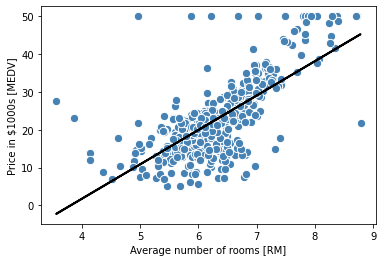

In [14]:
# 선형회귀

from sklearn.linear_model import LinearRegression
slr = LinearRegression(fit_intercept = True)
X = df[['RM']].values
y = df[['MEDV']].values
slr.fit(X, y)
print('기울기: %.3f'%slr.coef_[0])
print('절편: %.3f'%slr.intercept_)

plt.scatter(X, y, c = 'steelblue', edgecolor = 'white', s = 70)
plt.plot(X, slr.predict(X), color = 'black', lw = 2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [15]:
# RANSAC
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), max_trials = 100, min_samples = 50, loss = 'absolute_loss' ,residual_threshold = 5.0, random_state = 0)

ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_

outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

기울기: 10.735
절편: -44.089


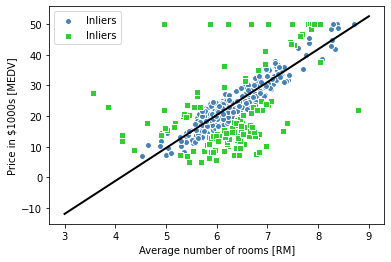

In [16]:
plt.scatter(X[inlier_mask], y[inlier_mask], c = 'steelblue',edgecolor = 'white', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c = 'limegreen',edgecolor = 'white', marker = 's', label = 'Inliers')

plt.plot(line_X, line_y_ransac, color = 'black', lw = 2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc = 'upper left')

print('기울기: %.3f'%ransac.estimator_.coef_[0])
print('절편: %.3f'%ransac.estimator_.intercept_)

# 3. Logistic Regression

로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘이다. 즉, 로지스틱 회귀는 분류에 사용되는 선형 회귀 계열이다.  

회귀가 선형인가 비선형인가는 독립변수가 아닌 가중치(weight) 변수가 선형인지 아닌지를 따른다. 로지스텍 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는것이 아니라, __`시그모이드(sigmoid)`__ 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다.  

간단히 말해 0과 1이 아닌 값을 해석하는 문제에 독립변수 증가에 따른 종속 변수가 1이 될 확률을 찾는 것이다.

## 1) Sigmoid(시그모이드)

로지스틱 회귀에서 Binary Classification 마지막 레이어의 활성함수로 사용되는 함수로 S자 커브 형태를 가지는 것이 특징이다.  

$$ s(z) = \frac{1}{1+e^{-z}}$$  

데이터를 두 개의 그룹으로 분류하는 문제에서 가장 기본적인 방법은 로지스틱 회귀분석이다. 회귀분석과의 차이는 회귀분석에서는 우리가 원하는 것이 예측값(실수)이기 때문에 종속변수의 범위가 실수이지만 로지스틱 회귀분석에서는 종속변수 $y$ 값이 0 또는 1을 갖는다. 그래서 우리는 주어진 데이터를 분류할 때 0인지 1인지 예측하는 모델을 만들어야 한다.

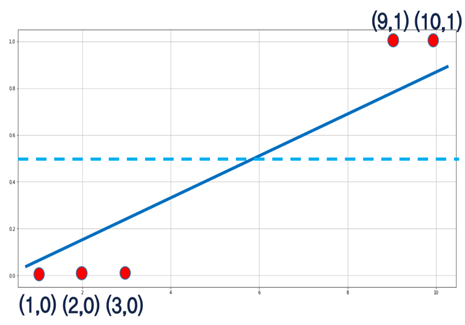  

위의 그림을 살펴보자. 빨간점은 데이터의 실제값을 의미한다. 전체 데이터를 분류하기 위해 우리는 선형 직선을 그어 각각을 분류하고 함수값이 1/2가 나오는 지점을 기준으로 x를 분류한다. 전체적으로 봤을땐 어느정도 분류가 잘 된 것 같다.  

그럼 (20,1)의 데이터를 삽입시킨다면 어떻게 될까?

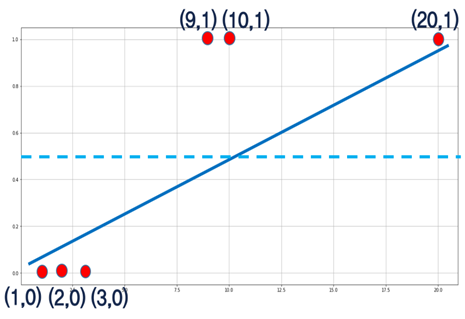  

다른 $x$ 값에 비해 큰 $x = 20$ 으로 인해서 선형함수의 기울기가 더 작아지고 새로운 데이터의 추가로 인해서 기존에 잘 분류되었던 (9,1)과 (10,1)을 분류하는데 실패하게 된다. 즉, 새로운 데이터의 추가가 기존의 분류 모델에 큰 영향을 미치게 된다.

그래서 로지스틱 회귀분석에서는 다음과 같은 형태의 함수를 활성함수로 사용하여 데이터를 성공과 실패로 분류한다.

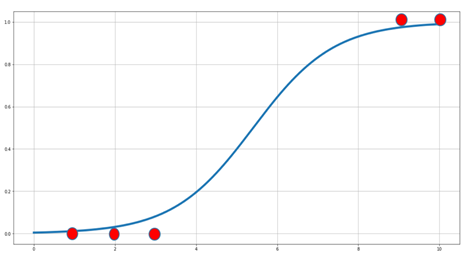  

함수의 특징은 다음과 같다.  

성공과 실패(0,1)을 구분하는 부분은 경사가 급하고, 나머지 부분에서는 경사가 완만* 하다.  
  
$y = 1, y = 1$ 두 선이 점근선이고, 치역은 (0,1)이다. 위와 같은 활성함수의 함수값은 성공확률이라고 해석할 수도 있다.

In [5]:
import numpy as np

x = np.linspace(-10, 10)
print('input\n', x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

output = sigmoid(x)
print('output\n', output)

threshold = 0.5
print(len(output))

input
 [-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]
output
 [4.53978687e-05 6.82792246e-05 1.02692018e-04 1.54446212e-04
 2.32277160e-04 3.49316192e-04 5.25297471e-04 7.89865942e-04
 1.18752721e-03 1.78503502e-03 2.68237328e-03 4.02898336e-03
 6.04752187e-03 9.06814944e-03 1.35769169e-02 2.02816018e-02
 3.01959054e-02 4.47353464e-02 6.58005831e-02 9.57904660e-02
 1.37437932e-01 1.9

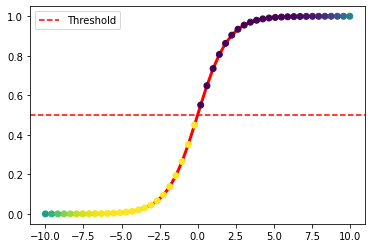

In [6]:
clfied_1 = output[output>=0.5]
clfied_0 = output[output<0.5]

plt.plot(x, output, color = 'r', linewidth = 3, zorder = 0)

plt.scatter(x, output, c = [clfied_1, clfied_0])

plt.axhline(0.5, color = 'r',linestyle = '--', label = 'Threshold')
plt.legend()
plt.show()

## 2) Logistic Regression 적용

지금까지 회귀문제에 대해 다뤄봤다. 이제 Logistic을 다루는 만큼 약간 방향을 틀어 분류문제를 다뤄보자.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

압축 전의 shape 
 (569, 30)
압충 후의 shape 
 (569, 1)


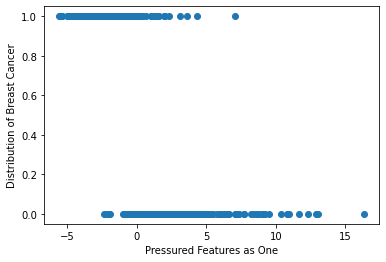

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)
print('압축 전의 shape \n', data_scaled.shape)

from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)
print('압충 후의 shape \n', pca_data.shape)

plt.scatter(pca_data, cancer.target)
plt.xlabel('Pressured Features as One')
plt.ylabel('Distribution of Breast Cancer')
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(pca_data, cancer.target, test_size = 0.3, random_state = 0)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

lr_proba = lr_clf.predict_proba(X_test)

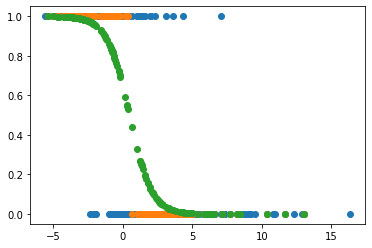

In [12]:
# 주어진 데이터의 원래 분포
plt.scatter(pca_data, cancer.target)

# 주황색 : logistic regression이 분류한 갓
plt.scatter(X_test, lr_preds)

# 초록색 : logistic regression이 예측한 확률
plt.scatter(X_test, lr_proba[:,1])

plt.show()

In [13]:
# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.895
roc_auc: 0.890


## 3) 장점과 단점

__< 장점 >__  

* 학습과 결과에 대한 해석이 쉽다.  

* 피쳐들이 특정 분포를 따른다른 가정이 필요하지 않다.  

* 다중 분류로 쉽게 확장 가능하다.  

* 속도가 굉장히 빠르고, 정확도도 높은 편이다.  

* 이진분류에서 뛰어난 성능을 보이고, 희소한 데이터 세트 분류에도 뛰어난 성능을 보여 텍스트 분석에도 자주 사용된다.

__< 단점 >__  

* 데이터 수 < 피쳐의 수 인 경우 사용 불가 -> overfitting  

* 종속변수가 이산변수로 제한된다  

* 너무 복잡한 모델의 경우, 로지스틱의 경우 딥러닝이 더 효율적!

# 4, 자전거 대여 수요 예측

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('data_set/bike_train.csv')
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [17]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [18]:
# datatime 삭제 / count로 알 수 있기 때문에 casual, registered 삭제
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MSE 는 scikit learn의 mean_absolute_error() 로 계산
    mse_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MSE: {2:.3F}'.format(rmsle_val, rmse_val, mse_val))

* LinerRegression

In [20]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MSE: 105.924


In [21]:
# 실제값과 예측 값의 차이가 어느정도 나는지 top5 개만 검색

def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

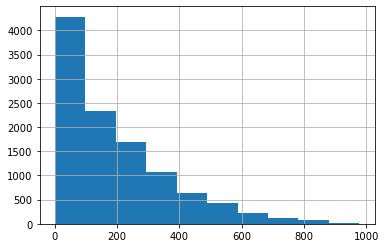

In [22]:
# 데이터 분포 확인
y_target.hist()

<AxesSubplot:>

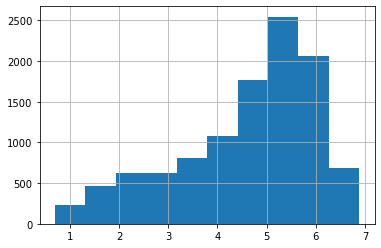

In [23]:
# 정규분포로 최대한 변형 -> log 취함

y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [24]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MSE: 109.286


<AxesSubplot:>

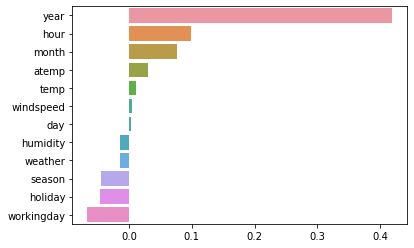

In [25]:
# 차이가 그렇게 많이나지 않는다.
##  왜 그런지 회귀계수 값을 찍어보자

coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

year가 가장 큰 이유는 2012, 2013과 같은 카테고리형 피쳐지만, 숫자형으로 되어있다. 따라서 이를 원핫인코딩 해야한다.

In [26]:
# 'year','month','hour','season','weather' feature들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','hour', 'holiday',
                                              'workingday','season','weather'])

In [27]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.589, RMSE: 97.484, MSE: 63.106
### Ridge ###
RMSLE: 0.589, RMSE: 98.407, MSE: 63.648
### Lasso ###
RMSLE: 0.634, RMSE: 113.031, MSE: 72.658


<AxesSubplot:>

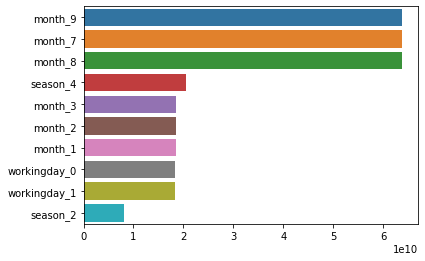

In [28]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 50.704, MSE: 31.396
### GradientBoostingRegressor ###
RMSLE: 0.340, RMSE: 55.797, MSE: 34.355
### XGBRegressor ###
RMSLE: 0.339, RMSE: 50.950, MSE: 30.891
### LGBMRegressor ###
RMSLE: 0.316, RMSE: 46.473, MSE: 28.777


앞의 성능보다 인코딩 한 후의 성능이 더 좋다!  

하지만 이것이 항상 좋은것은 아니다.  

적재적소에 데이터 전처리를 하여 성능을 높이는 것이 중요하다.

# 5. 캐글 주택 가격: 고급 회귀 기법

In [81]:
train_org = pd.read_csv('data_set/house_train.csv')

In [58]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_org = pd.read_csv('data_set/house_train.csv')
train = house_df_org.copy()
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [59]:
print("데이터 세트의 shape:",train.shape)
print('\n전체 피처의 type\n',train.dtypes.value_counts())
isnull_series=train.isnull().sum()
print("\nnull칼럼과 그 건수:\n",isnull_series[isnull_series>0].sort_values(ascending=False))

데이터 세트의 shape: (1460, 81)

전체 피처의 type
 object     43
int64      35
float64     3
dtype: int64

null칼럼과 그 건수:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


<AxesSubplot:title={'center':'Original sale price histogram'}, xlabel='SalePrice', ylabel='Density'>

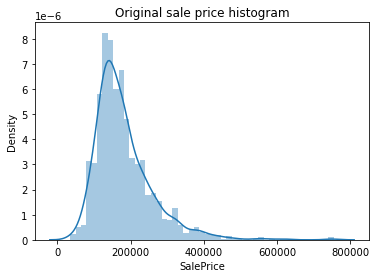

In [60]:
# 데이터값 분포 확인
plt.title('Original sale price histogram')
sns.distplot(train['SalePrice'])

<AxesSubplot:title={'center':'Log Transformed sale price histogram'}, xlabel='SalePrice', ylabel='Density'>

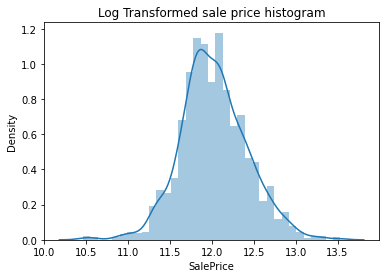

In [61]:
# 정규분포로 변환하기 위해 log 취함
plt.title('Log Transformed sale price histogram')
log_scaleprice=np.log1p(train['SalePrice'])
sns.distplot(log_scaleprice)

이제 정규 분포 형태로 결괏값이 분포함을 확인할 수 있다. 이제 saleprice를 로그 변환한뒤 dataframe에 반영하겠다.

그리고 null값이 많은 피처인 poolqc,miscreture,alley,fence,fireplaceGu는 삭제!! 그리고 id도 단순 식별자이므로 삭제, lotfrntage는 null값이 259개로 비교적 많으나 평균값으로 대체. 그리고 나머지 null피처는 null값이 많지 않으므로 숫자형의 경우 평균값으로 대체.

In [62]:
#saleprice 로그 변환
original_saleprice1=train['SalePrice']
train['SalePrice']=np.log1p(train['SalePrice'])


#NULL이 너무 많은 칼럼과 불필요한 칼럼 삭제
train.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)


#드롭하지 않는 숫자형 null칼럼은 평균값으로 대체
train.fillna(train.mean(),inplace=True)

In [63]:
#null값이 있는 피처명과 타입을 추출
null_column_count=train.isnull().sum()[train.isnull().sum()>0]
print("## null 피처의 type :\n",train.dtypes[null_column_count.index])

## null 피처의 type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [64]:
print('get_dummies() 수행 전 데이터 shape:',train.shape)
train_df_ohe=pd.get_dummies(train)
print('get_dummies() 수행 후 데이터 shape:',train_df_ohe.shape)

get_dummies() 수행 전 데이터 shape: (1460, 75)
get_dummies() 수행 후 데이터 shape: (1460, 271)


## Modeling

이미 타깃값인 saleprice 가 로그 변환되었고 예측값 역시 로그 변환된 saleprice값을 기반으로 예측하므로 원본 saleprice 예측 값의 로그 변환 값이다. 실제 값도 로그 변환됐고 예측값도 이를 반영한 로그 변환 값이므로 예측 결과가 오류에 rmse만 적용하면 rmsle가 자동으로 측정된다.

In [ ]:
import numpy as np

def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [69]:
def get_rmse(model):
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test,pred)
    rmse=np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE:',np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses=[]
    for model in models:
        rmse=get_rmse(model)
        rmses.append(rmse)
    return rmses

In [70]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y=train_df_ohe['SalePrice']
X=train_df_ohe.drop('SalePrice',axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156)

#LinearRegression Ridge Lasso 학습,예측,평가
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)


models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.176


[0.13189576579154566, 0.12750846334053048, 0.17628250556471406]

라쏘회귀으 경우 회귀 성능이 타 회귀 방식보다 많이 떨어지는 결과가 나왔다. 라쏘의 경우 하이퍼 파라미터 튜닝이 필요해 보인다.  

$alpha$ 하이퍼 파라미터 최적화를 릿지와 라쏘 모델에 대해서 수행하겠다.  

먼저 피처별 회귀 계수를 시각화해 모델별로 어떤 피처의 회귀 계수로 구성되는지 확인해보겠다. 피처가 많으니 회귀 계수 값이 상위 10개 하위 10개의 피처명과 그 회귀 계수 값을 가지는 series객체를 반환하는 함수를 만들겠다.

In [71]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

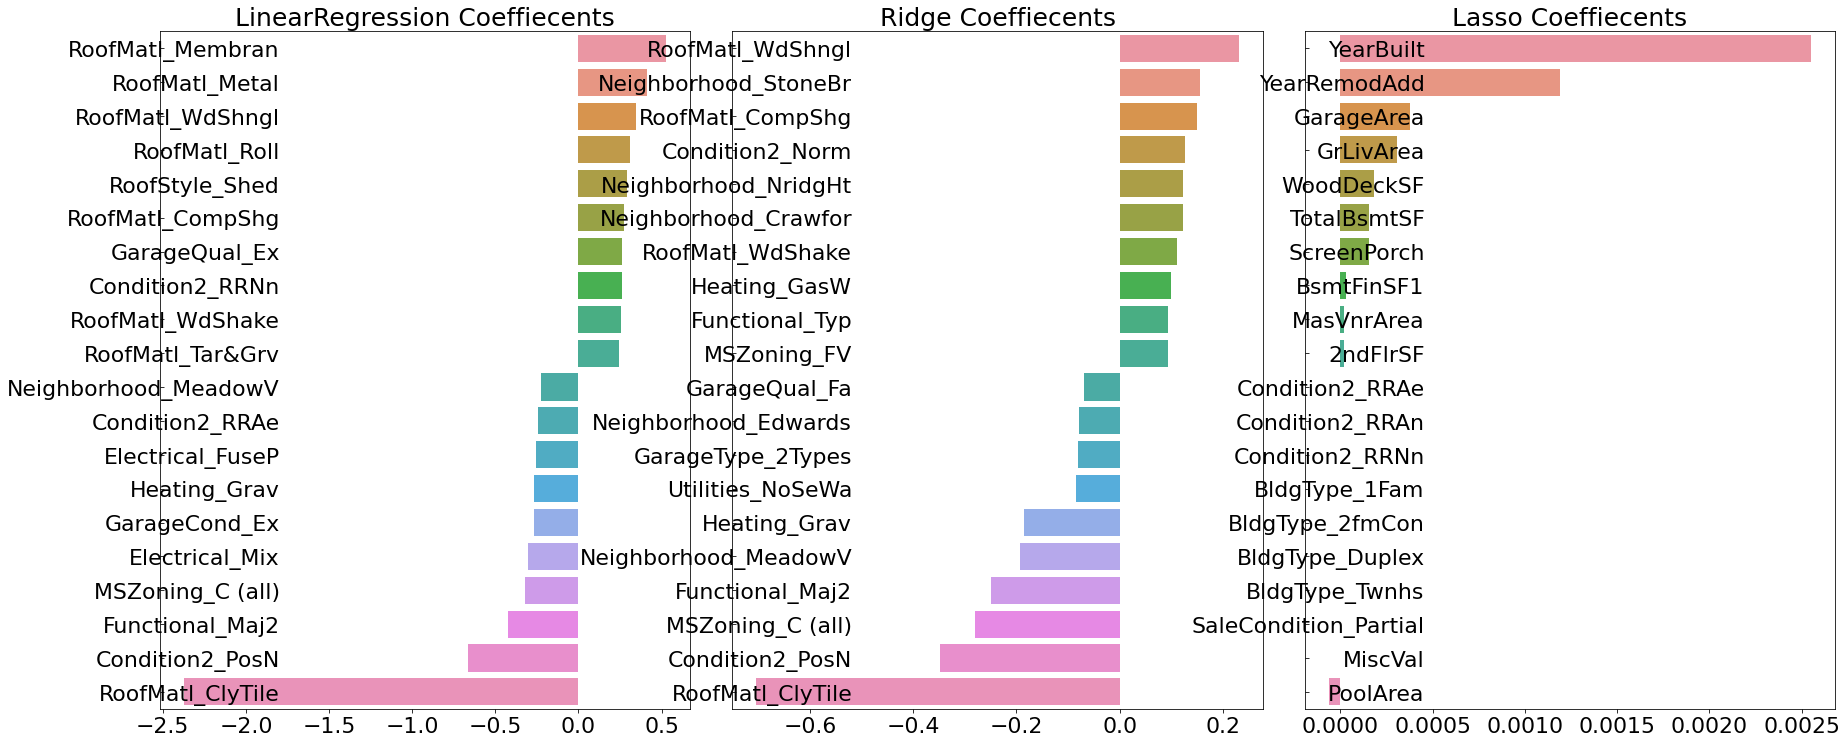

In [72]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

라쏘의 경우 전체적으로 회귀계수가 값이 너무 작다. 학습 데이터 분할에 문제가 있다고 판단하여 교차 검증을 진행해보자.

In [73]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

  for model in models:
    #분할하지 않고 전체 데이터로 cross_val_score() 수행, 모델별 cv rmse값과 평균 rmse 출력
    rmse_list=np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5))
    rmse_avg=np.mean(rmse_list)
    print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
    print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

#앞예제에서 학습한 모델들의 cv rmse값 출력
models=[lr_reg,ridge_reg,lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값: 0.155

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


여전히 라쏘가 이상하다. 그럼 $alpha$ 값을 바꾸면서 회귀 계수 값을 조절해보자

In [74]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model,params):
  grid_model=GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=5)
  grid_model.fit(X,y)
  rmse=np.sqrt(-1*grid_model.best_score_)
  print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))

ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.142, 최적 alpha:{'alpha': 0.001}


라쏘의 성능이 어느정도 잡혔다.  

이제 모델링을 해보자

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.12


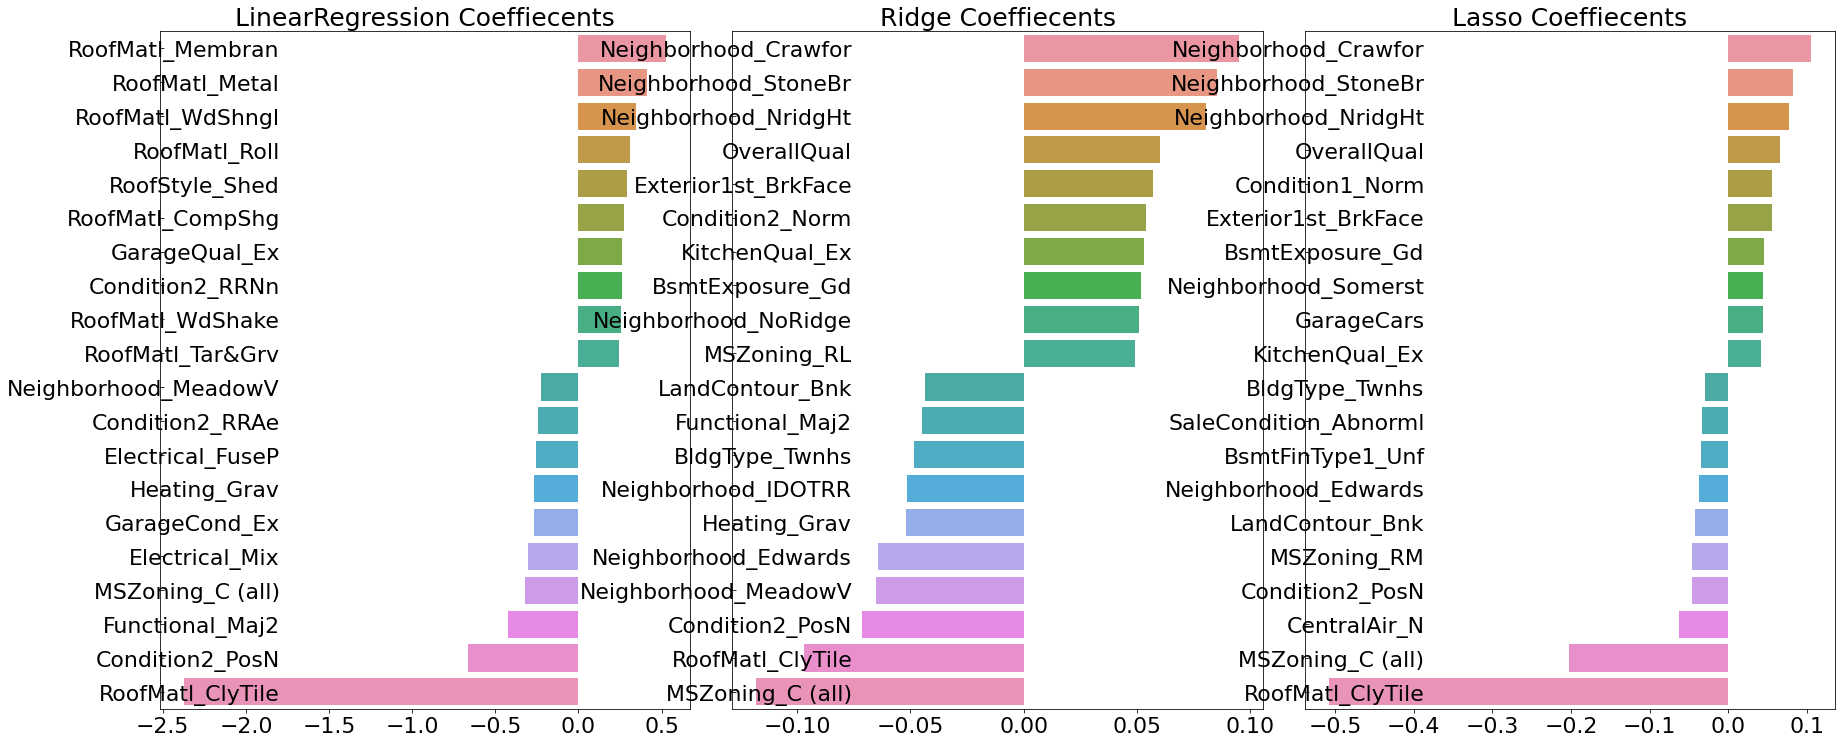

In [75]:
#앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge(alpha=12)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

#모든 모델의 RMSE 출력
models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

#모든 모델의 회귀 계수 시각화
models=[lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

어느정도 회귀계수가 잡혔지만 라쏘의 경우 같은 피쳐라도 회귀계수가 상대적으로 낮은 편이다.  

데이터 세트를 추가적으로 가공해서 튜닝을 좀 더 해보자.  

1. 피쳐 데이터 세트의 데이터 분포도  

2. 이상치 처리

### 피쳐 데이터 세트의 데이터 분포도  

`skew()` 모듈을 사용해보자.  

일반적으로 반환 값이 1 이사인 경우를 왜곡 정도가 높다고 판단한다.  

skew를 쓰면서 주의점은 숫자형 피쳐에서 원-핫 인코딩 된 카테고리 숫자형 피쳐는 제외해야 한다. 카테고리 피쳐는 코드성 피쳐이므로 인코딩시 당연히 왜곡될 가능성이 높다.

In [76]:
from scipy.stats import skew

#object가 아닌 숫자형 피처의 칼럼 index 객체 추출
features_index=train.dtypes[train.dtypes!='object'].index

#train에 칼럼 index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew()호출
skew_features=train[features_index].apply(lambda x:skew(x))
#skew(왜곡) 정도가 1이상인 칼럼만 추출
skew_features_top=skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [77]:
# skew 결과 1 이상인 피쳐들 log 변환
train[skew_features_top.index]=np.log1p(train[skew_features_top.index])

로그 변환 후 이 피처들의 왜곡 정도를 다시 확인해 보면 여전히 높은 왜곡정도를 가진 피처가 있지만 더 이상 로그 변환을 하더라도 개선하기는 어렵기에 그대로 유지한다. train의 피처를 일부 로그 변환했으므로 다시 원핫 인코딩을 적용한 train_df_ohe를 만들겠다. 그리고 이에 기반한 피처 데이터 세트와 타깃 데이터 세트, 학습/테스트 데이터 세트를 모두 다시 만들겠다. 이렇게 마든 데이터 세트에 다시 앞에서 생성한 print_best_params()함수를 이용해 최적 alpha값과 rmse를 출력해 보겠다.

In [78]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
train_ohe = pd.get_dummies(train)
y = train_ohe['SalePrice']
X =train_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1275, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1252, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.128
Ridge 로그 변환된 RMSE: 0.122
Lasso 로그 변환된 RMSE: 0.119


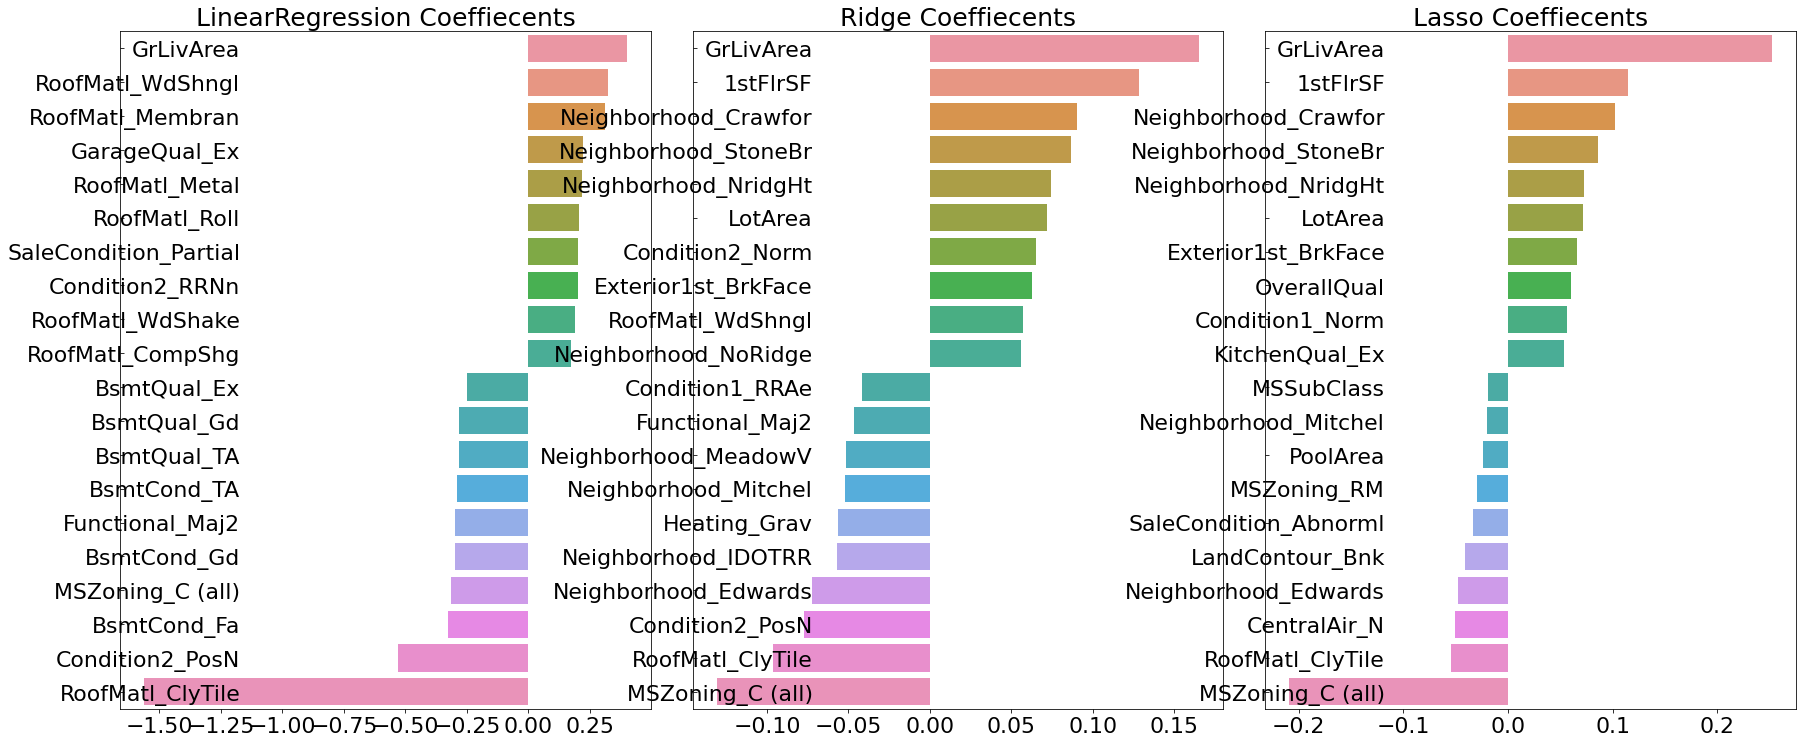

In [79]:
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge(alpha=10)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

#모든 모델의 RMSE 출력
models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

#모든 모델의 회귀 계수 시각화
models=[lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

### 이상치 처리

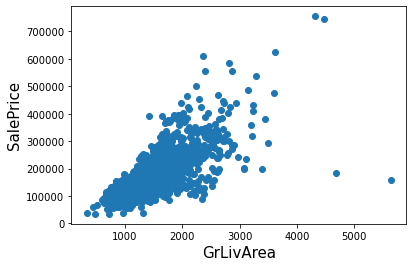

In [82]:
# 회귀게수가 가장 큰 GrLivArea 와 상관관계 비교
plt.scatter(x = train_org['GrLivArea'], y = train_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

2개의 데이터가 이상치라고 판단 -> 삭제 조치

In [83]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = train_ohe['GrLivArea'] > np.log1p(4000)
cond2 = train_ohe['SalePrice'] < np.log1p(500000)
outlier_index = train_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', train_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
train_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', train_ohe.shape)

아웃라이어 레코드 index : [ 523 1298]
아웃라이어 삭제 전 house_df_ohe shape: (1460, 271)
아웃라이어 삭제 후 house_df_ohe shape: (1458, 271)


In [84]:
y = train_ohe['SalePrice']
X = train_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.103
Lasso 로그 변환된 RMSE: 0.1


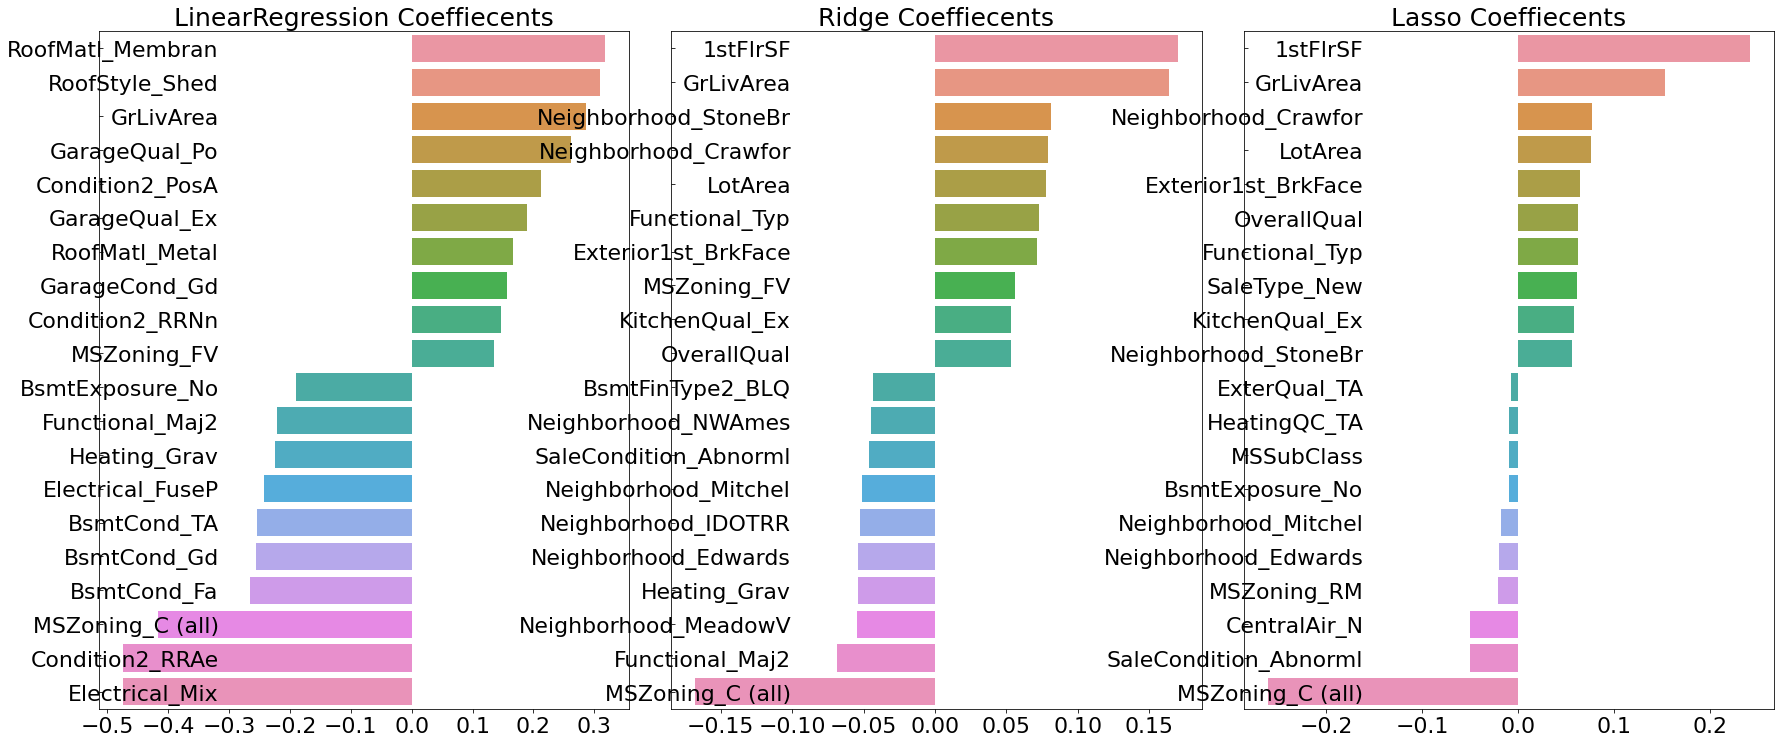

In [85]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

이상치 2개를 제거했을 뿐인데 어느정도의 성능 향상을 보였다.

## 회귀 트리 모델 학습/예측/평가

In [86]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1178, 최적 alpha:{'n_estimators': 1000}


In [87]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1163, 최적 alpha:{'n_estimators': 1000}


In [89]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.10007930884470505
Ridge 모델의 RMSE: 0.10345177546603217
Lasso 모델의 RMSE: 0.1002417046089003


In [90]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
  
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.10170077353447762
XGBM 모델의 RMSE: 0.10738295638346222
LGBM 모델의 RMSE: 0.10382510019327311


## 스태킹 앙상블 모델을 통한 회귀 예측

회귀에서도 스태킹을 사용할 수 있다.

In [91]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
       
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
   
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [92]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

In [93]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.09799152965189675
